# Data Parsing and Visualisation 
--- 
This notebook demonstrates how we conduct data parsing and some simple EDA to visualise and analyse the data. 

## Part 1: Data Parsing 
The following is what we have done (in order): 
1. Read in data info csv as info, unzip dataset0.json.gz and read in the json data. 
2. Calculate the mean, median, std, min, max for the length, std and mean of the signal at each of the 3 positions (1-,central, 1+) and save the results into result_df. We have then generated 45 numerical features from our dataset0. 
3. Merged result_df with the label data. The final merged_data df have 121838 rows and 50 columns. 

In [1]:
import json
import pandas as pd
import numpy as np

Please modify the datapath based on your local directory 

In [2]:
info = pd.read_csv("../data.info")

Before you run the following code, run !gzip -d dataset0.json.gz in the terminal to unzip the data file 

In [3]:
data_list = []

with open('../dataset0.json', 'r') as json_file:
    for line in json_file:
        data = json.loads(line)
        data_list.append(data)


In [13]:
len(data_list)

121838

In [ ]:
list(data_list[1].items())[0][0]

In [ ]:
full = list(data_list[1].items())[0]
list(full[1].items())[0][0]

'261'

In [ ]:
full_2 = list(full[1].items())[0]
list(full_2[1].items())[0][0]

'CAAACTG'

In [ ]:
full_2 = list(full[1].items())[0]
list(full_2[1].items())[0][1]

[[0.0126, 1.95, 111.0, 0.0125, 1.27, 108.0, 0.00996, 2.94, 101.0],
 [0.00432, 2.35, 111.0, 0.00559, 2.4, 106.0, 0.00332, 1.39, 94.5],
 [0.00266, 3.81, 108.0, 0.00645, 3.59, 108.0, 0.00827, 2.12, 93.3],
 [0.00498, 2.79, 109.0, 0.0206, 3.68, 111.0, 0.00303, 6.33, 92.4],
 [0.00664, 2.68, 114.0, 0.0104, 2.22, 108.0, 0.00232, 5.59, 89.2],
 [0.00564, 3.19, 108.0, 0.0083, 8.05, 100.0, 0.00744, 2.17, 93.4],
 [0.00797, 2.86, 111.0, 0.00289, 3.25, 109.0, 0.00432, 2.86, 97.7],
 [0.00398, 2.56, 109.0, 0.00232, 2.73, 101.0, 0.0208, 3.22, 94.0],
 [0.0116, 2.42, 110.0, 0.0091, 3.22, 109.0, 0.0113, 2.53, 94.8],
 [0.00797, 4.86, 108.0, 0.00831, 3.07, 110.0, 0.00465, 1.76, 91.8],
 [0.0186, 4.31, 109.0, 0.00232, 1.94, 104.0, 0.0193, 3.1, 93.1],
 [0.00529, 2.68, 106.0, 0.00266, 0.789, 104.0, 0.00564, 3.81, 92.6],
 [0.0153, 17.0, 108.0, 0.00442, 3.06, 110.0, 0.00764, 2.37, 93.0],
 [0.00598, 3.22, 113.0, 0.0093, 4.78, 108.0, 0.00232, 2.88, 94.7],
 [0.00498, 2.44, 111.0, 0.00431, 2.44, 109.0, 0.0126, 2.59, 9

In [4]:
def explore_dataset(data_list):
    results = []
    for data in data_list:
        trans_id, first = next(iter(data.items()))
        position, second = next(iter(first.items()))
        sequence, data = next(iter(second.items()))

        avg = np.mean(data, axis=0)
        med = np.median(data, axis=0)
        smallest = np.min(data, axis=0)
        largest = np.max(data, axis=0)
        std = np.std(data, axis=0)

        result = [trans_id, position, sequence] + list(avg) + list(med) + list(smallest) + list(largest) + list(std)
        results.append(result)

    return results

results = explore_dataset(data_list)


In [5]:
result_df = pd.DataFrame(results)

In [6]:
result_df.head(5)

,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,45,46,47
0,ENST00000000233,244,AAGACCA,0.008264,4.223784,123.702703,0.009373,7.382162,125.913514,0.007345,...,88.3,0.005384,1.843025,4.944365,0.005364,3.302671,2.765244,0.004566,2.906225,2.522168
1,ENST00000000233,261,CAAACTG,0.006609,3.216424,109.681395,0.006813,3.226535,107.889535,0.007710,...,103.0,0.003588,1.689167,2.981182,0.003767,1.237045,3.526528,0.004528,1.466295,2.492530
2,ENST00000000233,316,GAAACAG,0.007570,2.940541,105.475676,0.007416,3.642703,98.947027,0.007555,...,96.2,0.004444,1.311103,1.492577,0.005035,0.893481,3.203816,0.004497,0.800496,1.484341
3,ENST00000000233,332,AGAACAT,0.010620,6.476350,129.355000,0.008632,2.899200,97.836500,0.006102,...,95.7,0.006121,2.459317,3.202963,0.004612,1.393868,1.928009,0.003595,0.741771,3.494937
4,ENST00000000233,368,AGGACAA,0.010701,6.415051,117.924242,0.011479,5.870303,121.954545,0.010019,...,90.5,0.007151,2.743228,2.664643,0.005407,1.753894,2.177236,0.005908,1.341822,2.379045


In [6]:
colnames = ['transcript_id', 'transcript_position', 'sequence']
for i in ['1-flank', 'central', '1+flank']:
    for q in ['avg', 'med', 'min', 'max', 'std']:
        for j in ["length", "std", "mean"]:
            colnames.append(i + '_' + j + '_' + q)

result_df.columns = colnames


In [61]:
result_df.shape

(121838, 48)

In [7]:
result_df['transcript_position'] = result_df['transcript_position'].astype(int)

In [8]:
result_df.head()

,transcript_id,transcript_position,sequence,1-flank_length_avg,1-flank_std_avg,1-flank_mean_avg,1-flank_length_med,1-flank_std_med,1-flank_mean_med,1-flank_length_min,...,1+flank_mean_med,1+flank_length_min,1+flank_std_min,1+flank_mean_min,1+flank_length_max,1+flank_std_max,1+flank_mean_max,1+flank_length_std,1+flank_std_std,1+flank_mean_std
0,ENST00000000233,244,AAGACCA,0.008264,4.223784,123.702703,0.009373,7.382162,125.913514,0.007345,...,88.3,0.005384,1.843025,4.944365,0.005364,3.302671,2.765244,0.004566,2.906225,2.522168
1,ENST00000000233,261,CAAACTG,0.006609,3.216424,109.681395,0.006813,3.226535,107.889535,0.007710,...,103.0,0.003588,1.689167,2.981182,0.003767,1.237045,3.526528,0.004528,1.466295,2.492530
2,ENST00000000233,316,GAAACAG,0.007570,2.940541,105.475676,0.007416,3.642703,98.947027,0.007555,...,96.2,0.004444,1.311103,1.492577,0.005035,0.893481,3.203816,0.004497,0.800496,1.484341
3,ENST00000000233,332,AGAACAT,0.010620,6.476350,129.355000,0.008632,2.899200,97.836500,0.006102,...,95.7,0.006121,2.459317,3.202963,0.004612,1.393868,1.928009,0.003595,0.741771,3.494937
4,ENST00000000233,368,AGGACAA,0.010701,6.415051,117.924242,0.011479,5.870303,121.954545,0.010019,...,90.5,0.007151,2.743228,2.664643,0.005407,1.753894,2.177236,0.005908,1.341822,2.379045


In [65]:
info.head()

,gene_id,transcript_id,transcript_position,label
0,ENSG00000004059,ENST00000000233,244,0
1,ENSG00000004059,ENST00000000233,261,0
2,ENSG00000004059,ENST00000000233,316,0
3,ENSG00000004059,ENST00000000233,332,0
4,ENSG00000004059,ENST00000000233,368,0


In [9]:
merged_data = pd.merge(result_df, info, on=['transcript_id', 'transcript_position'], how='inner')

In [10]:
merged_data.head()

,transcript_id,transcript_position,sequence,1-flank_length_avg,1-flank_std_avg,1-flank_mean_avg,1-flank_length_med,1-flank_std_med,1-flank_mean_med,1-flank_length_min,...,1+flank_std_min,1+flank_mean_min,1+flank_length_max,1+flank_std_max,1+flank_mean_max,1+flank_length_std,1+flank_std_std,1+flank_mean_std,gene_id,label
0,ENST00000000233,244,AAGACCA,0.008264,4.223784,123.702703,0.009373,7.382162,125.913514,0.007345,...,1.843025,4.944365,0.005364,3.302671,2.765244,0.004566,2.906225,2.522168,ENSG00000004059,0
1,ENST00000000233,261,CAAACTG,0.006609,3.216424,109.681395,0.006813,3.226535,107.889535,0.007710,...,1.689167,2.981182,0.003767,1.237045,3.526528,0.004528,1.466295,2.492530,ENSG00000004059,0
2,ENST00000000233,316,GAAACAG,0.007570,2.940541,105.475676,0.007416,3.642703,98.947027,0.007555,...,1.311103,1.492577,0.005035,0.893481,3.203816,0.004497,0.800496,1.484341,ENSG00000004059,0
3,ENST00000000233,332,AGAACAT,0.010620,6.476350,129.355000,0.008632,2.899200,97.836500,0.006102,...,2.459317,3.202963,0.004612,1.393868,1.928009,0.003595,0.741771,3.494937,ENSG00000004059,0
4,ENST00000000233,368,AGGACAA,0.010701,6.415051,117.924242,0.011479,5.870303,121.954545,0.010019,...,2.743228,2.664643,0.005407,1.753894,2.177236,0.005908,1.341822,2.379045,ENSG00000004059,0


In [69]:
file_path = "merged_data.csv"

merged_data.to_csv(file_path, index=False)

In [70]:
merged_data.shape

(121838, 50)

## Part 2: Basic EDA 
--- 
We will then conduct some data analysis & visualisation on the merged dataset. In summary, below are what we have done: 

1. Overall description of the dataset --> different range, may consider standardise the mean & std to avoid latent weight
2. Examine the distribution of Label --> Imbalanced data, may consider to perform undersampling 
3. Check for outliers --> feels no need to remove outliers -- but we can discuss 
4. PCA analysis --> not v useful as data are densely packed. 5 components explain only ~60% of the features 
5. (In progress) T-SNE visualisation --> identify important features among all the 45 numerical columns 
6. Examine the distribution of gene_id, transcript_id and transcript position --> Some gene/transcript is actually more active than others. Possible to create a column to rank / indicate their activness? We may suspect that those more actively expressed gene/transcript could have a higher chance of m6A modification 
7. (Not done yet) Correlation Analysis --> We will study the correlation between those numerical features, the categorical data (if created activeness as according to point 6, include this as well) and the label. This better tells us if there is any highly correlated features & their importance towards the label  

Take note that after training, we can do one / few more rounds of analysis to extract important features 

Take note that I only did exploration & list some ideas of how we can do data processing -- **I didn't actually change any column yet**. We should probably do it after train test split 

In [11]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121838 entries, 0 to 121837
Data columns (total 50 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   transcript_id        121838 non-null  object 
 1   transcript_position  121838 non-null  int64  
 2   sequence             121838 non-null  object 
 3   1-flank_length_avg   121838 non-null  float64
 4   1-flank_std_avg      121838 non-null  float64
 5   1-flank_mean_avg     121838 non-null  float64
 6   1-flank_length_med   121838 non-null  float64
 7   1-flank_std_med      121838 non-null  float64
 8   1-flank_mean_med     121838 non-null  float64
 9   1-flank_length_min   121838 non-null  float64
 10  1-flank_std_min      121838 non-null  float64
 11  1-flank_mean_min     121838 non-null  float64
 12  1-flank_length_max   121838 non-null  float64
 13  1-flank_std_max      121838 non-null  float64
 14  1-flank_mean_max     121838 non-null  float64
 15  1-flank_length_st

In [12]:
merged_data.describe() 

,transcript_position,1-flank_length_avg,1-flank_std_avg,1-flank_mean_avg,1-flank_length_med,1-flank_std_med,1-flank_mean_med,1-flank_length_min,1-flank_std_min,1-flank_mean_min,...,1+flank_length_min,1+flank_std_min,1+flank_mean_min,1+flank_length_max,1+flank_std_max,1+flank_mean_max,1+flank_length_std,1+flank_std_std,1+flank_mean_std,label
count,121838.000000,121838.000000,121838.000000,121838.000000,121838.000000,121838.000000,121838.000000,121838.000000,121838.000000,121838.000000,...,121838.000000,121838.000000,121838.000000,121838.000000,121838.000000,121838.000000,121838.000000,121838.000000,121838.000000,121838.000000
mean,1615.868407,0.008108,4.342127,110.789403,0.008127,5.157547,110.946258,0.007057,2.974051,86.203293,...,0.004887,1.528758,3.336146,0.004831,1.828684,3.194697,0.004001,1.260798,2.448322,0.044937
std,1395.137528,0.001787,1.936267,11.289521,0.001693,2.184069,12.460242,0.001296,0.894199,4.937330,...,0.001505,0.759305,1.459925,0.001403,0.942802,1.000186,0.001170,0.716917,0.727562,0.207166
min,3.000000,0.003616,1.361306,80.370000,0.003803,1.441381,87.071498,0.003537,1.350225,72.231429,...,0.000953,0.218941,0.649221,0.001160,0.227231,0.601585,0.000900,0.175260,0.520369,0.000000
25%,673.000000,0.006799,2.853595,104.596000,0.006904,3.221361,98.816048,0.006151,2.282982,82.050397,...,0.003805,0.928450,2.230443,0.003839,0.956595,2.428203,0.003194,0.688769,1.939124,0.000000
50%,1256.000000,0.007760,3.835318,110.122035,0.007834,4.669024,114.536673,0.006822,2.814199,86.500000,...,0.004662,1.463543,3.056331,0.004645,1.851367,3.094400,0.003829,1.137486,2.356568,0.000000
75%,2139.000000,0.009101,5.420603,119.299837,0.009066,6.963261,121.552632,0.007714,3.494345,89.997368,...,0.005731,2.026709,4.157467,0.005617,2.533590,3.858959,0.004612,1.682102,2.854246,0.000000
max,18730.000000,0.019119,11.644615,136.285714,0.021581,12.128800,137.120000,0.016344,11.898750,105.773134,...,0.018516,33.715770,15.988131,0.020400,30.349842,9.739463,0.015972,30.331393,19.727495,1.000000


As we can see, the range of dataset could be quite difference for length, std and mean. We might consider standardise their mean and std to make them follow a normal distribution. We hthen show the plot of the distribution for each of the numerical column. 

<Axes: xlabel='label'>

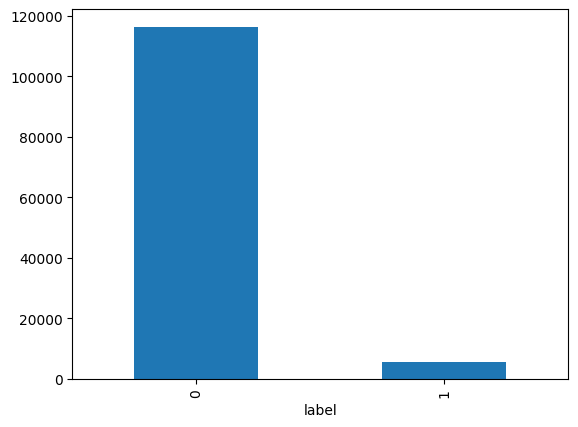

In [14]:
# View distribution of labels 
merged_data['label'].value_counts().plot(kind='bar')

The data is highly imbalanced. given the large size of the data, we may consider to perform undersampling to truncate the label 0 to handle the imbalanced dataset. 

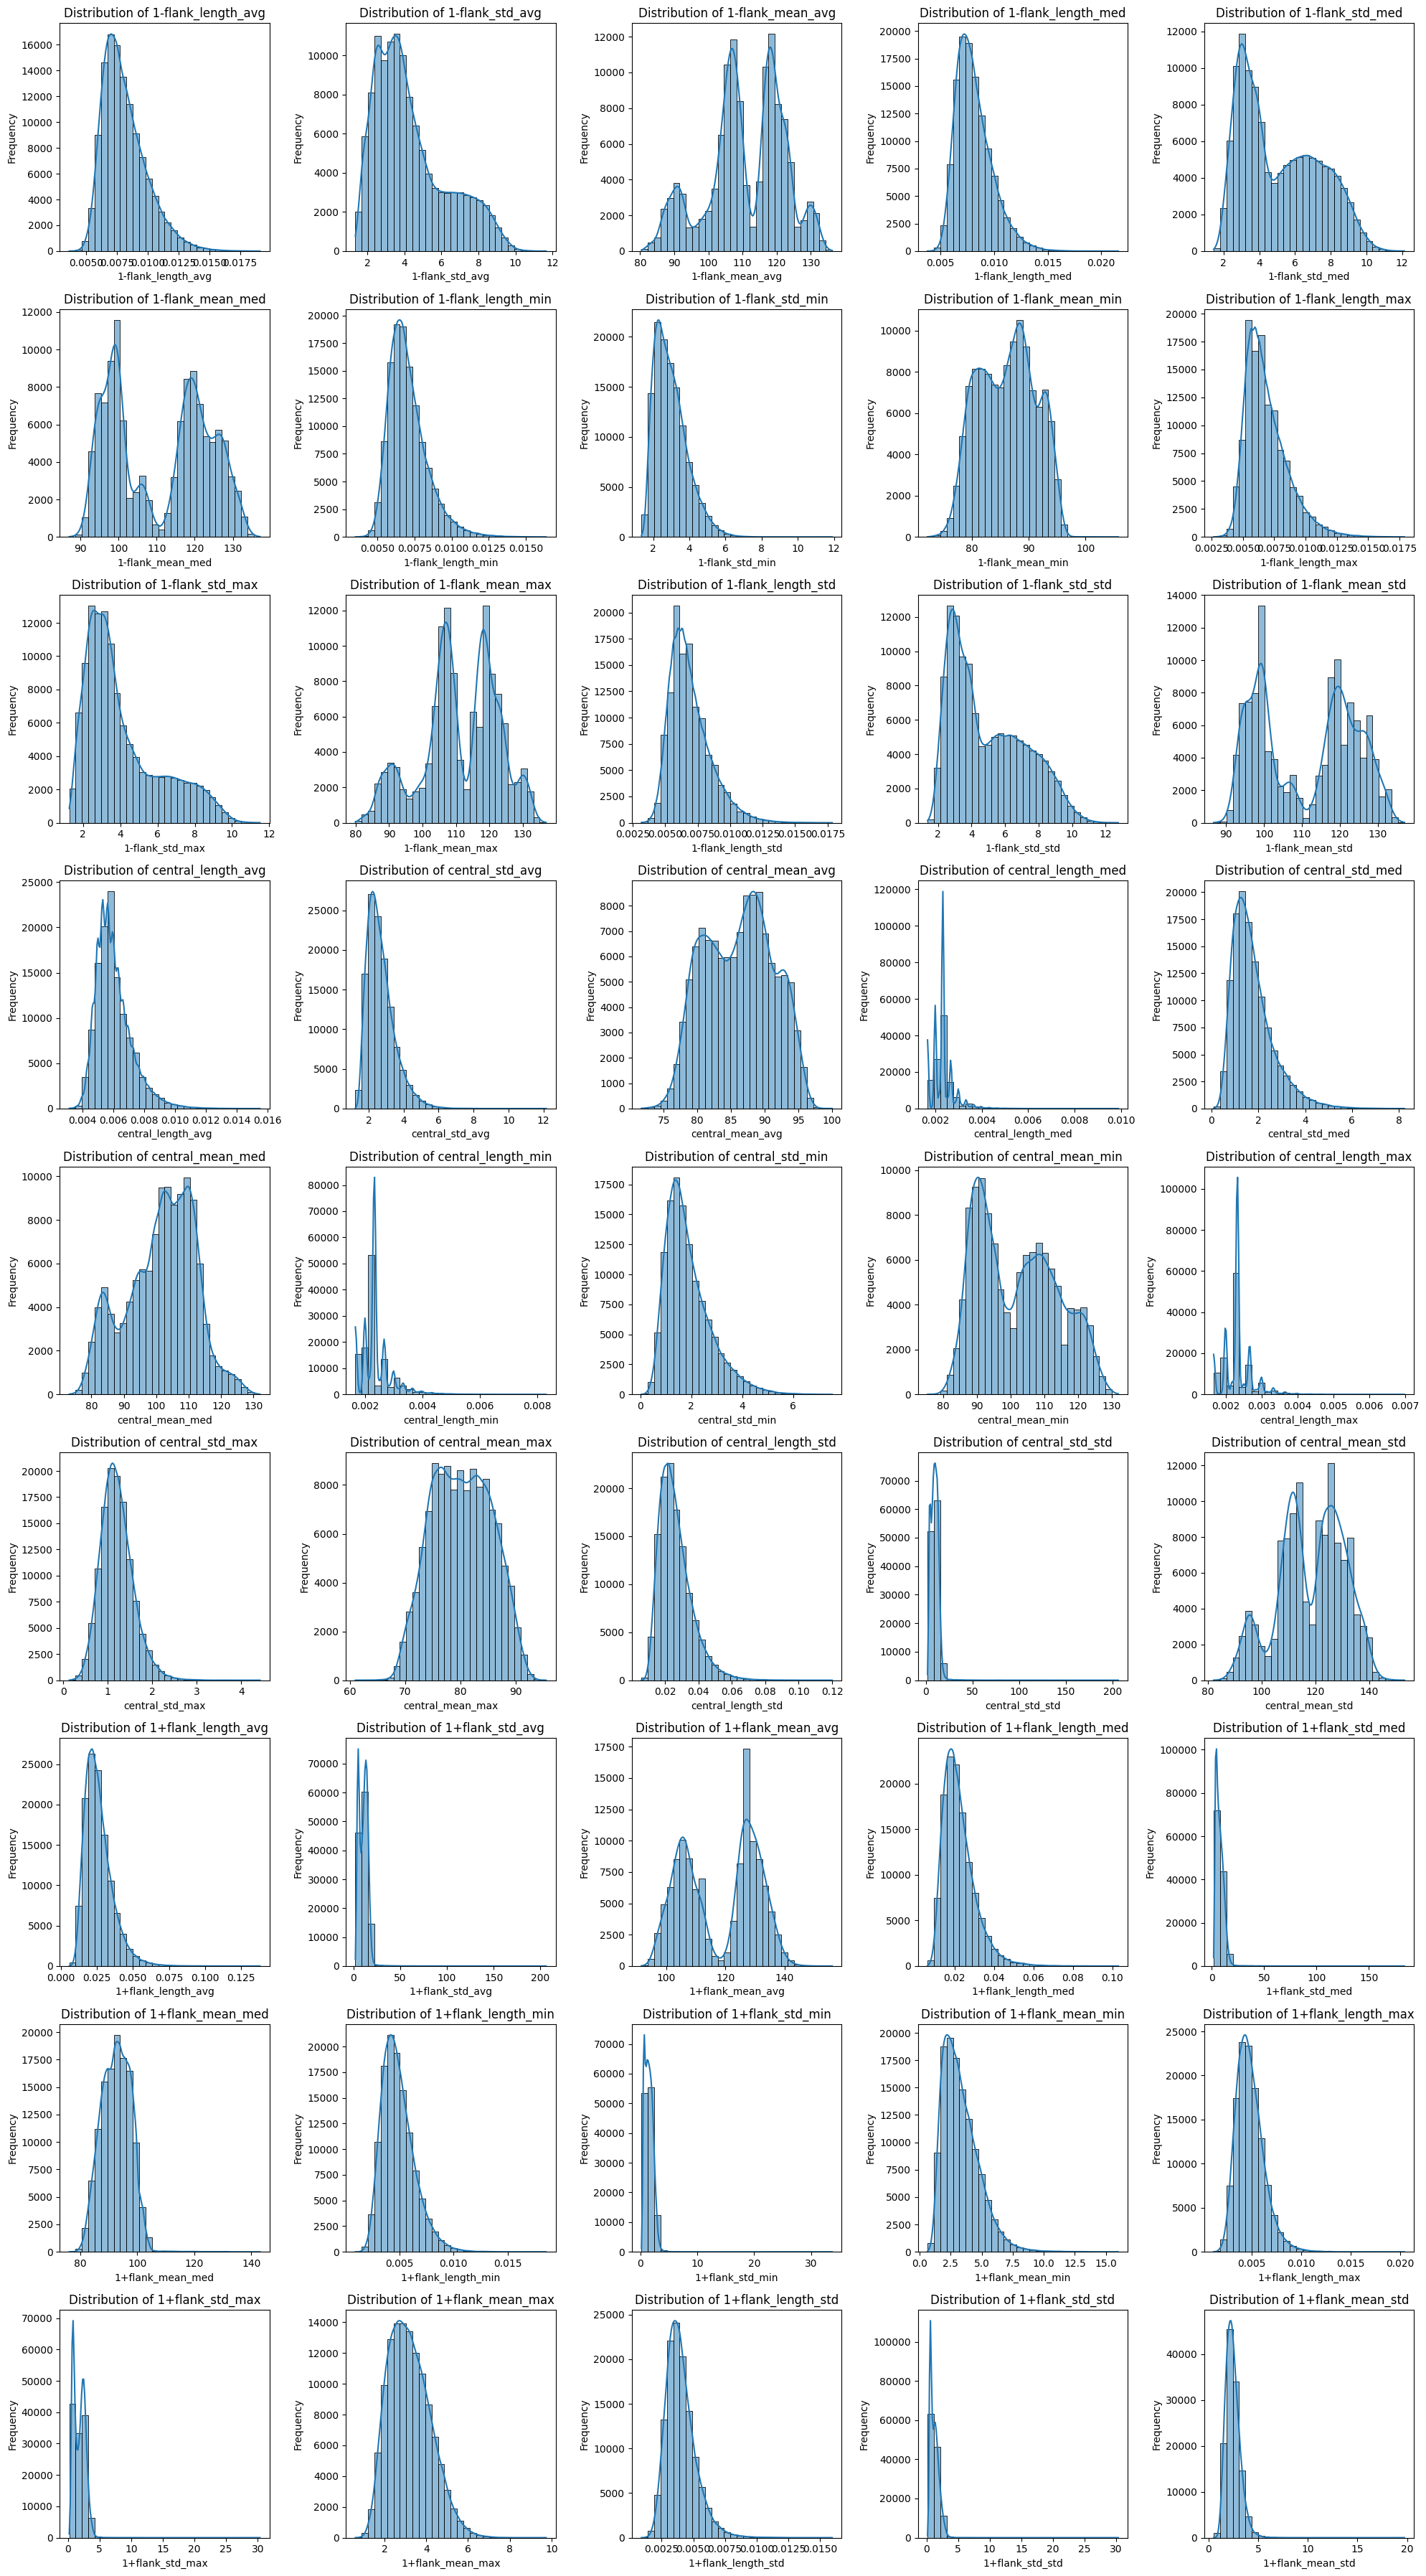

In [13]:
# visualise the 45 numerical column's distribution 
import seaborn as sns
import matplotlib.pyplot as plt

# Extract the columns you want to plot
columns_to_plot = merged_data.columns[3:48]  

# Create subplots for each column
fig, axes = plt.subplots(nrows=9, ncols=5, figsize=(20, 36))  

# Flatten the 2D array of axes for easy iteration
axes = axes.flatten()

# Loop through each numerical column and create a distribution plot
for i, column in enumerate(columns_to_plot):
    sns.histplot(merged_data[column], ax=axes[i], kde=True, bins=30)  
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()


As we see there are some with 2 peak -- This is a sign that some of our features are following a bimodel distribution instead of a unimodel distribution. We can consider either transform them with log to make them unimodel, or keep the bimodel property which we can consider use them to seperate the data later on. 

The columns that seems to follow bimodel distribution are: 
1. 1+flank_mean_avg 
2. certral_mean_std
3. 1-flank_mean_avg 
4. 1-flank_mean_med
5. 1-flank_mean_max 
6. 1-flank_mean_std 

We do have some other columns that have a distribution similar to bimodel. Other than that, most of our data follow normal distribution, so we just have to scale their mean and std 

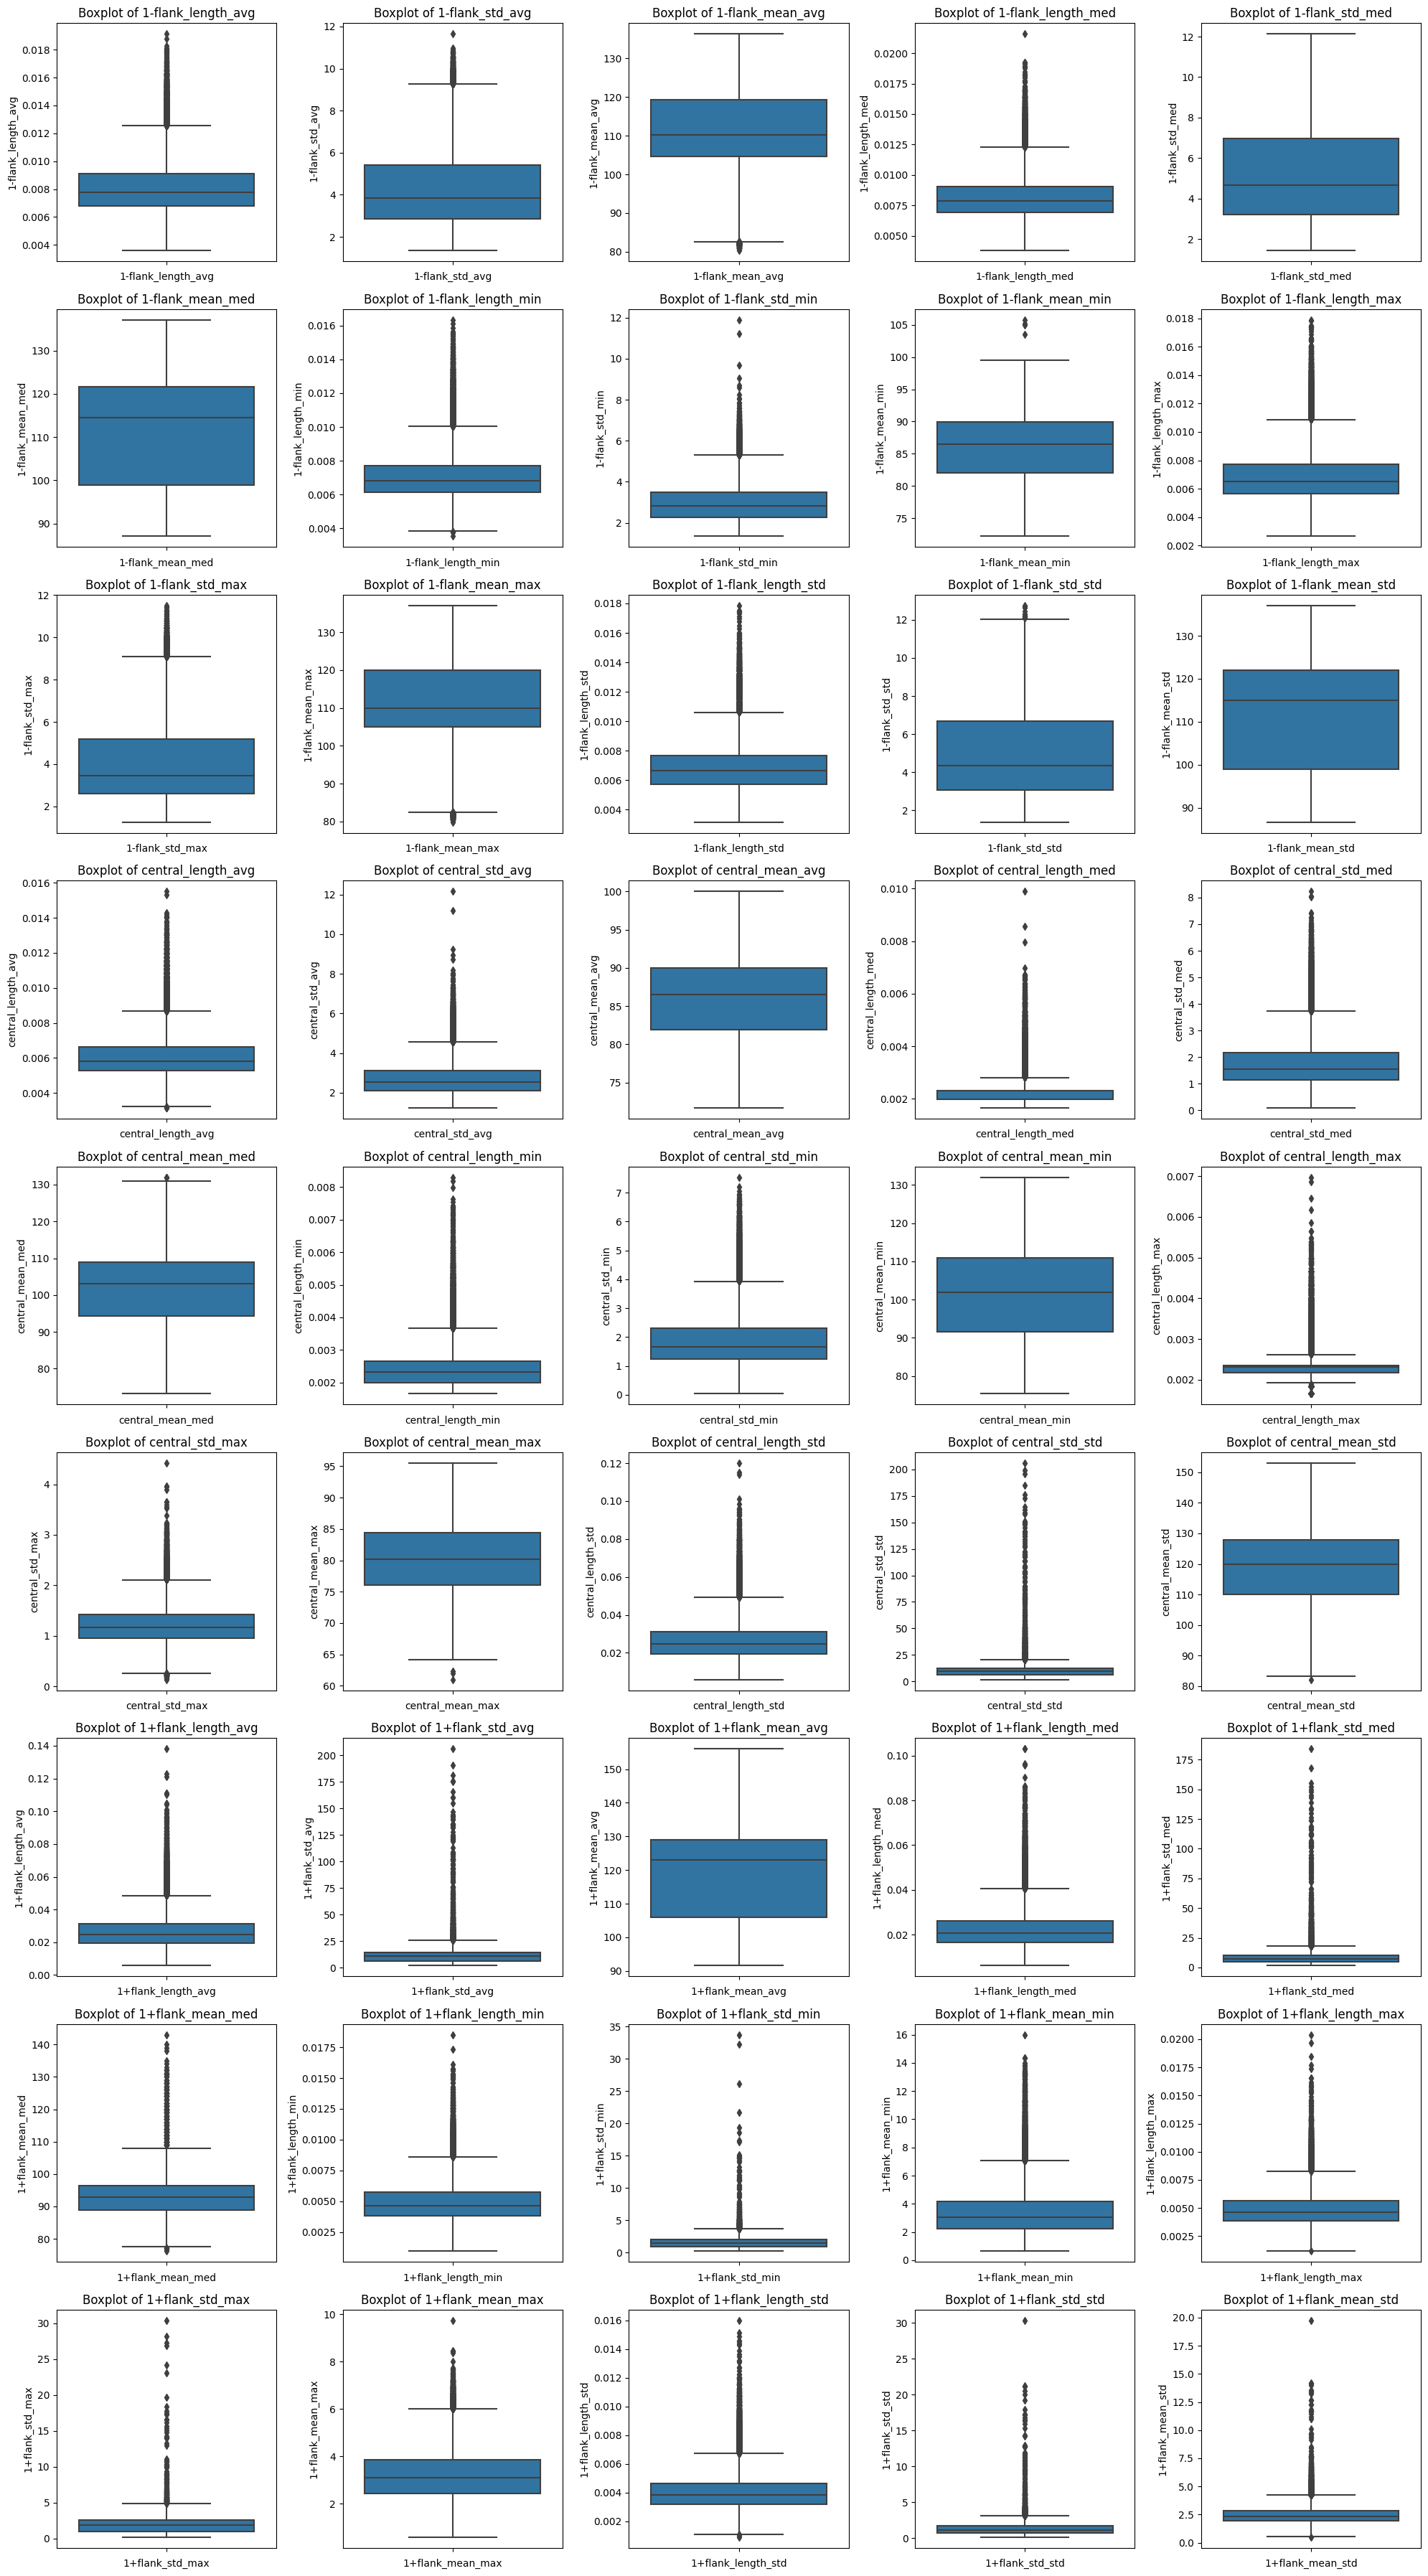

In [14]:
# check for outliers 
# Visualize outliers using boxplots
fig, axes = plt.subplots(nrows=9, ncols=5, figsize=(20, 36))

# Flatten the 2D array of axes for easy iteration
axes = axes.flatten()

# Loop through each numerical column and create a box plot
for i, column in enumerate(columns_to_plot):
    sns.boxplot(y=merged_data[column], ax=axes[i])
    axes[i].set_title(f'Boxplot of {column}')
    axes[i].set_xlabel(column)

plt.tight_layout()
plt.show()


Do we want to handle the outliers? 

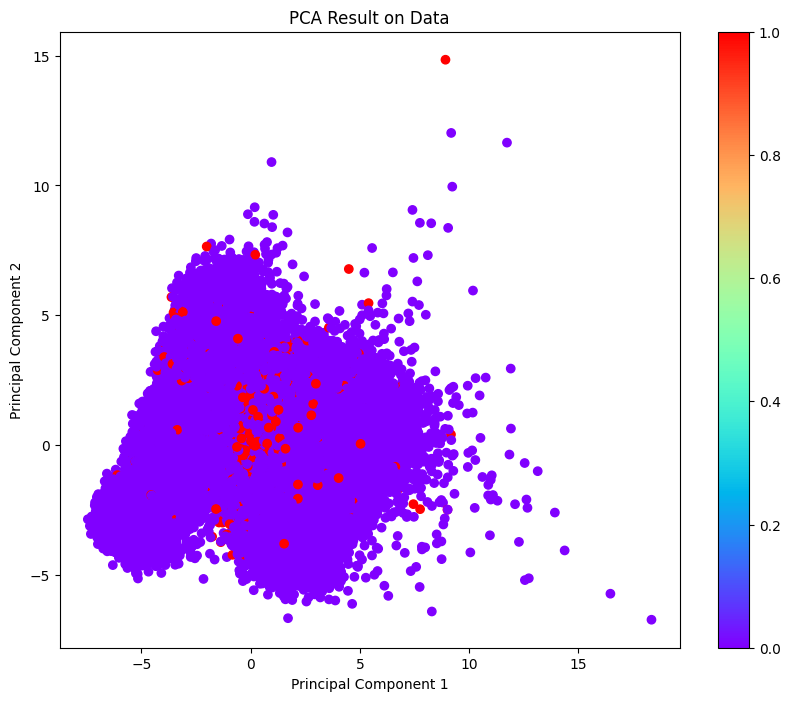

In [15]:
# Perform PCA reduction 
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(merged_data[columns_to_plot])

# Apply PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data)

# Visualize the first two principal components
plt.figure(figsize=(10, 8))
plt.scatter(principal_components[:, 0], principal_components[:, 1],
            c=merged_data['label'], cmap='rainbow')  # color by 'label' if it's a categorical variable
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Result on Data')
plt.colorbar()
plt.show()


As shown by the plot, PCA does not seem to explain the importance of features well as the data are closely packed together. We examine the explained variance ratio above to decide on the number of components. 

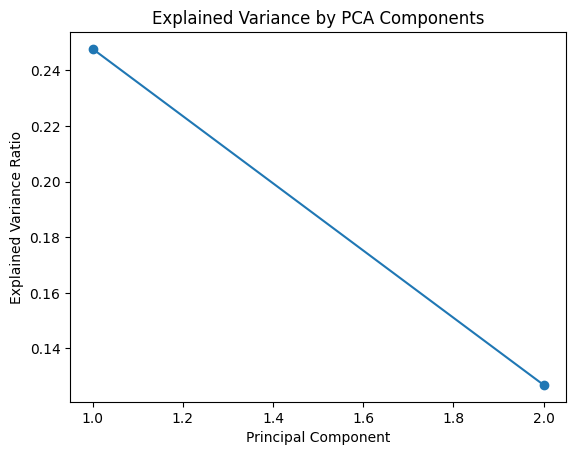

In [17]:
explained_variance = pca.explained_variance_ratio_
plt.plot(range(1, len(explained_variance) + 1), explained_variance, '-o')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance by PCA Components')
plt.show()


From the ratio above, we can see that PCA 1 explain about 25% of the features and PCA2 explain less than 14%. Both are not a very high ratio. The first two principal components together only account for ~ 38% of the total variance in the dataset. This means a significant portion of the data's structure (62%) is not represented in these two components. Therefore, reducing the dimensionality of the dataset to just these two components may lose a lot of information.

We are going to perform another round of 5 components and visualise it again. 

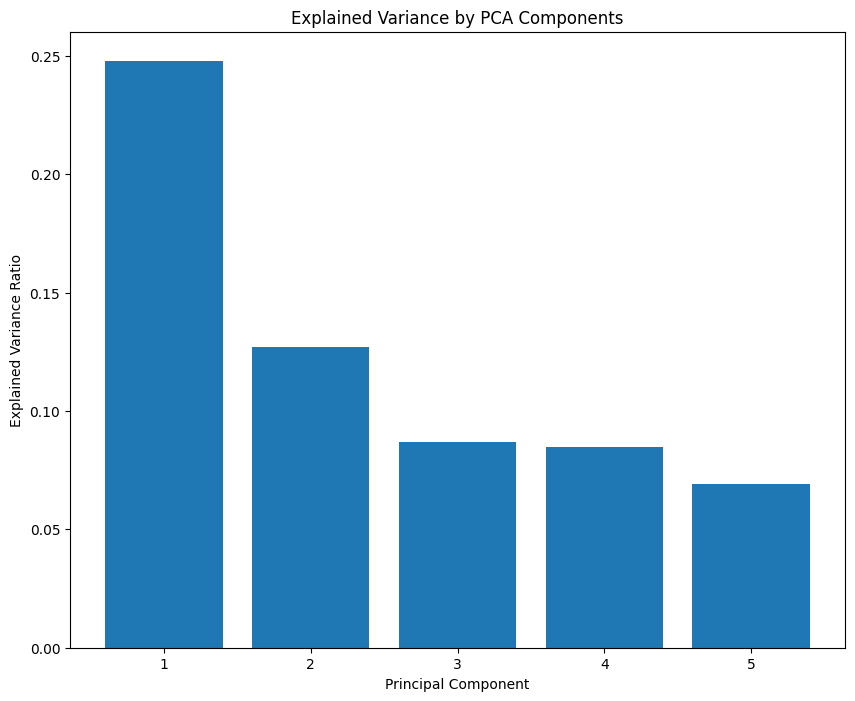

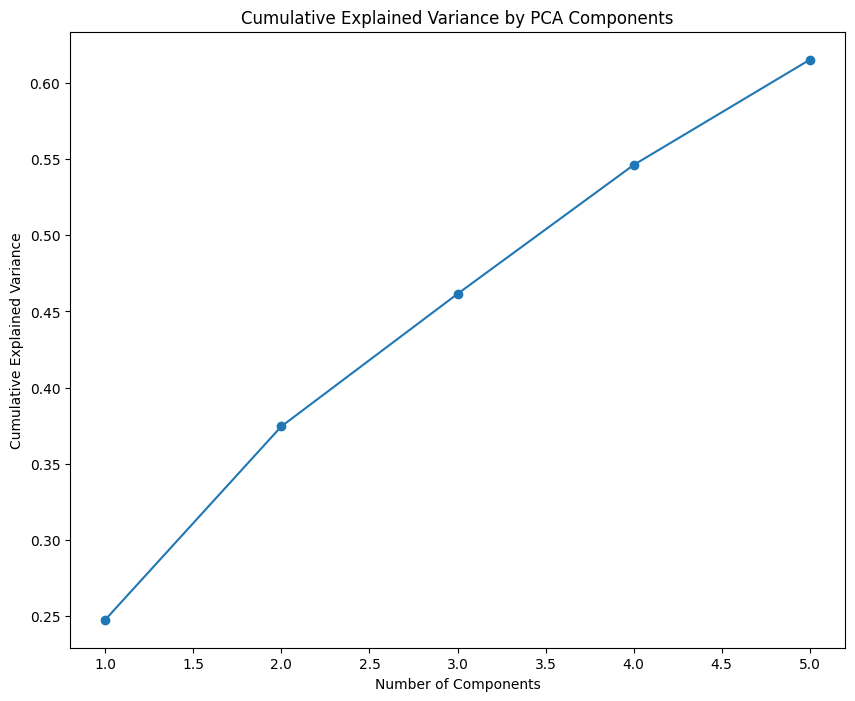

In [21]:
# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(merged_data[columns_to_plot])

# Apply PCA with 5 components
pca = PCA(n_components=5)
principal_components = pca.fit_transform(scaled_data)

# Visualize the variance explained by each component
explained_variance = pca.explained_variance_ratio_

# Plot the variance explained by each component
plt.figure(figsize=(10, 8))
plt.bar(range(1, len(explained_variance) + 1), explained_variance)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance by PCA Components')
plt.show()

# Plot the cumulative variance explained
plt.figure(figsize=(10, 8))
plt.plot(range(1, len(explained_variance) + 1), np.cumsum(explained_variance), '-o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by PCA Components')
plt.show()


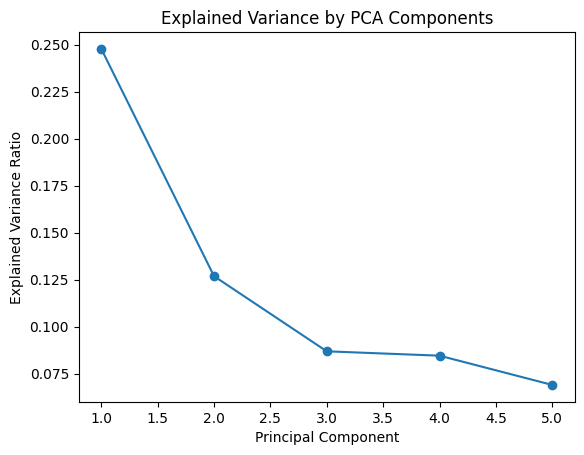

In [22]:
explained_variance = pca.explained_variance_ratio_
plt.plot(range(1, len(explained_variance) + 1), explained_variance, '-o')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance by PCA Components')
plt.show()

We can see that with 5 components, we get to explain ~ 60% of the features. The result is in fact not very ideal, (expecting at least 80% of the features being explained) We will reserve the observation and investigate this further if necessary 

Lastly, Instead of using PCA, T-SNE might be a good choice to view high dimension data in low dimension space. 

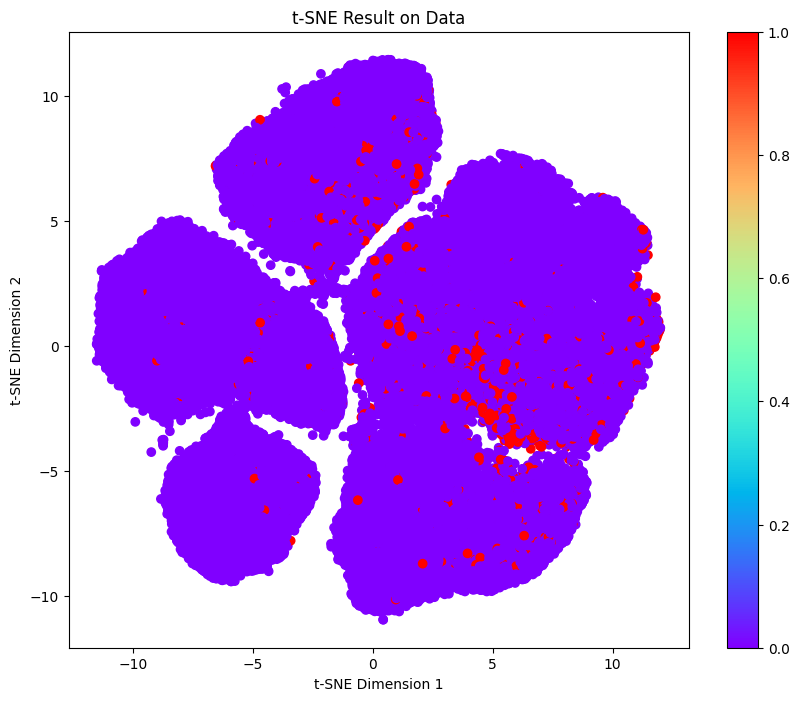

In [16]:
# T-SNE dimension reduction 
from sklearn.manifold import TSNE

# Apply t-SNE
tsne = TSNE(n_components=2, perplexity=30, n_iter=300)  # Adjust parameters for optimal results
tsne_results = tsne.fit_transform(scaled_data)

# Visualize the t-SNE results
plt.figure(figsize=(10, 8))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], 
            c=merged_data['label'], cmap='rainbow')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.title('t-SNE Result on Data')
plt.colorbar()
plt.show()


We can see about 5 clusters by using t-SNE. Let's analyse this information further with the help of chatGPT 

In [18]:
# Assign cluster label using kmeans 
from sklearn.cluster import KMeans

# Using KMeans to cluster the t-SNE results
n_clusters = 5  # Adjust based on visual inspection of your t-SNE plot
kmeans = KMeans(n_clusters=n_clusters)
cluster_labels = kmeans.fit_predict(tsne_results)

# Add the cluster labels to the original dataframe
merged_data['cluster_label'] = cluster_labels


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [19]:
print(merged_data['cluster_label'].value_counts())


cluster_label
1    30566
3    27208
4    26546
2    22003
0    15515
Name: count, dtype: int64


In [20]:
# examine feature distribution 
# For summary statistics
for cluster_num in range(n_clusters):
    print(f"Cluster {cluster_num} Summary:")
    print(merged_data[merged_data['cluster_label'] == cluster_num].describe())
    print("\n")


Cluster 0 Summary:
       transcript_position  1-flank_length_avg  1-flank_std_avg  \
count         15515.000000        15515.000000     15515.000000   
mean           1907.718337            0.006800         2.199240   
std            1447.710607            0.000961         0.517428   
min              15.000000            0.003627         1.361306   
25%             912.000000            0.006131         1.816824   
50%            1595.000000            0.006702         2.076087   
75%            2531.500000            0.007353         2.472488   
max           18730.000000            0.012762         7.992703   

       1-flank_mean_avg  1-flank_length_med  1-flank_std_med  \
count      15515.000000        15515.000000     15515.000000   
mean          93.287182            0.007215         2.631242   
std            7.556886            0.001139         0.682220   
min           80.370000            0.004371         1.441381   
25%           88.288562            0.006435         2.285

In [25]:
# Example using boxplot for a feature
feature_to_plot = "1-flank_length_avg"  # Choose any feature of interest
plt.figure(figsize=(12, 6))
sns.boxplot(data=merged_data, x='cluster_label', y=feature_to_plot)
plt.title(f'Distribution of {feature_to_plot} by Cluster')
plt.show()

In [24]:
# categorical data 
print(merged_data['gene_id'].value_counts())
print(merged_data['transcript_id'].value_counts())
print(merged_data['transcript_position'].value_counts())
print(merged_data['sequence'].value_counts())

gene_id
ENSG00000128050    274
ENSG00000110321    253
ENSG00000164924    250
ENSG00000141367    230
ENSG00000138434    229
                  ... 
ENSG00000153015      1
ENSG00000147853      1
ENSG00000090432      1
ENSG00000214413      1
ENSG00000106605      1
Name: count, Length: 3852, dtype: int64
transcript_id
ENST00000621829    118
ENST00000269122    108
ENST00000378535    107
ENST00000375643    106
ENST00000216277    104
                  ... 
ENST00000608083      1
ENST00000372945      1
ENST00000370087      1
ENST00000370105      1
ENST00000464220      1
Name: count, Length: 5333, dtype: int64
transcript_position
389     90
565     88
420     87
693     87
597     86
        ..
6675     1
4912     1
5174     1
5436     1
5448     1
Name: count, Length: 7099, dtype: int64
sequence
AAAACAA    1359
AGAACAA     954
AAAACAT     914
AAAACTT     902
AAAACTG     893
           ... 
ATAACCG      49
CGAACTA      46
CTAACCG      45
CGAACCG      39
TAGACCG      39
Name: count, Length: 288, 

Noticed that the categorical data is actually not evenly distributed. We have some gene / transcript / even position that is more commonly seen than others. This indicates that we have some more highly expressed gene/transcript. It is possible, that we create some new categorical labels to indicate whether the gene/transcript is active or not 

In [ ]:
# correlation analysis 